# Filecoin Plus

[Filecoin Plus](https://docs.filecoin.io/basics/how-storage-works/filecoin-plus) is based on a set of guiding principles, detailed in FIP-0003, that focus the program on increasing Filecoin’s effectiveness at becoming the decentralized storage network for humanity’s most important information.

Root key-holders, notaries, clients, and storage providers, interact through the allocation and spending of DataCap. Notaries retrieve DataCap in batches and then allocate it to trustworthy clients that spend the DataCap to fund storage deals. Storage providers that receive DataCap receive a 10x boost to their quality-adjusted power for the storage space offered in that deal, which increases their block reward share in the network. This creates a mechanism that incentivizes all participants to make Filecoin more useful.

DataCap, when allocated to a client, can be spent by the client in storage deals with storage providers. Those deals carry a higher deal quality multiplier, which increases the “quality adjusted power” of the storage provider on the network by a factor of 10, yielding better block rewards for the storage provider over time. DataCap is granted in batches to Notaries, who can allocate it to clients that spend the DataCap to fund storage deals. DataCap is consumed as it is used to make deals.



In [1]:
import requests
import os
import pandas as pd

# There are two APIs collecting Datacap data:
#   - https://api.datacapstats.io/docs
#   - https://documenter.getpostman.com/view/131998/Tzsim4NU#intro (Fil Plus)
url = "https://api.datacapstats.io/"


Let's expore the verified clients first.

In [2]:
verified_clients = pd.DataFrame(
    requests.get(url + "api/getVerifiedClients").json()["data"]
)


In [3]:
verified_clients.head()


,id,addressId,address,retries,auditTrail,name,orgName,region,website,industry,...,createdAtHeight,issueCreateTimestamp,createMessageTimestamp,verifierName,dealCount,providerCount,topProvider,receivedDatacapChange,usedDatacapChange,allowanceArray
0,2620,f02057935,f1vsm4yuhdt2emj44oct33gvah7nfky6cl4bvbokq,3,n/a,NationalOceanic and Atmospheric Administration,,United States,https://registry.opendata.aws/noaa-gefs/ http...,Environment,...,2946954,NaN,1686715020,LDN v3.1 multisig,68910.0,23.0,8.74,0,406750582800384,"[{'id': 6022, 'error': '', 'height': 2946954, ..."
1,2905,f02126522,f1iaezpdxjmhbobtngflwhfg7eqgxfhn2vmharkwq,3,n/a,,"Quantitative Finance, Department of Mathematic...",,https://www.math.nus.edu.sg/,,...,2946943,NaN,1686714690,LDN EFil+,93576.0,9.0,22.45,0,2295299242459136,"[{'id': 6021, 'error': '', 'height': 2946943, ..."
2,3097,f02223047,f1zkgx3igrmczror3zuvvp5bohpbeli6coyns5lba,3,n/a,VanGogh Impression Original Art Gallery,,,,,...,2946893,NaN,1686713190,LDN v3.1 multisig,NaN,NaN,None,None,None,"[{'id': 6020, 'error': '', 'height': 2946893, ..."
3,2647,f02060396,f1o27reuxezrfhymyt2jbmuxabf3xupkrkzvhfu5i,3,n/a,FileGuard,,China,https://fileguard.io,Web3 / Crypto,...,2946888,NaN,1686713040,LDN v3.1 multisig,56000.0,7.0,21.37,0,723478651076608,"[{'id': 6019, 'error': '', 'height': 2946888, ..."
4,2947,f02168993,f1c2unlsfmqzgff3q25xep73nrfxygtujzeubbqqq,3,n/a,,,,,,...,2946885,NaN,1686712950,LDN v3.1 multisig,22233.0,5.0,20.29,0,439839010848768,"[{'id': 6018, 'error': '', 'height': 2946885, ..."


How many unique addresses are there?

In [7]:
verified_clients["addressId"].nunique()


2749

Might be some duplicates!

In [8]:
verified_clients["addressId"].value_counts().head(10)


addressId
f0743060     8
f022341      7
f0397376     6
f01614121    5
f01379794    5
f0215074     5
f0421499     5
f0680681     4
f01837713    4
f01069489    4
Name: count, dtype: int64

In [9]:
verified_clients[verified_clients["addressId"] == "f02060396"].values


array([[2647, 'f02060396', 'f1o27reuxezrfhymyt2jbmuxabf3xupkrkzvhfu5i',
        3, 'n/a', 'FileGuard', '', 'China', 'https://fileguard.io',
        'Web3 / Crypto', '4119650166951117', '2195504818343117',
        'f02049625', 2946888, nan, 1686713040, 'LDN v3.1 multisig',
        56000.0, 7.0, '21.37', '0', '723478651076608',
        list([{'id': 6019, 'error': '', 'height': 2946888, 'msgCID': 'bafy2bzaceb4rgtkcaokkxumigsi5bfp7fzo7gvprlojiif5qi52mnuit72l66', 'retries': 0, 'addressId': 'f02060396', 'allowance': '2195504818343117', 'auditTrail': 'https://github.com/filecoin-project/filecoin-plus-large-datasets/issues/1711', 'allowanceTTD': None, 'issueCreator': '9623093', 'usedAllowance': '0', 'isLdnAllowance': False, 'isEFilAllowance': False, 'verifierAddressId': 'f02049625', 'isFromAutoverifier': False, 'searchedByProposal': True, 'issueCreateTimestamp': 1677810610, 'hasRemainingAllowance': True, 'createMessageTimestamp': 1686713040}, {'id': 5640, 'error': 'matching request event not f

In [10]:
# Allowance details for f02060396
pd.json_normalize(
    verified_clients[verified_clients["addressId"] == "f02060396"][
        "allowanceArray"
    ].values[0]
).values


array([[6019, '', 2946888,
        'bafy2bzaceb4rgtkcaokkxumigsi5bfp7fzo7gvprlojiif5qi52mnuit72l66',
        0, 'f02060396', '2195504818343117',
        'https://github.com/filecoin-project/filecoin-plus-large-datasets/issues/1711',
        nan, '9623093', '0', False, False, 'f02049625', False, True,
        1677810610, True, 1686713040],
       [5640, 'matching request event not found, uuid method', 2831564,
        'bafy2bzacedqhxgofahbglbga7hdonzwoquktaw7q3w4y2wo2q4xmubiigl2xa',
        0, 'f02060396', '1099511627776000',
        'https://github.com/filecoin-project/filecoin-plus-large-datasets/issues/1711',
        726049.0, '9623093', '1219633273110528', True, False,
        'f02049625', False, True, 1677810610, True, 1683253320],
       [5546, 'matching request event not found, uuid method', 2743575,
        'bafy2bzacedwwru6svbccnd24gd3bnv5ufd6upumdilgegvibeeahroobrjjws',
        0, 'f02060396', '549755813888000',
        'https://github.com/filecoin-project/filecoin-plus-large-

Are we missing any client that has made verified deals?

In [7]:
%load_ext sql
%sql duckdb:////tmp/database.duckdb

In [8]:
%%sql
create or replace table state_market_deals as (
    select DealID, Proposal.*, State.* from read_ndjson_auto("/tmp/ParsedStateMarketDeals.json")
)

Running query in 'duckdb:////tmp/database.duckdb'

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Count
36806346


In [3]:
unique_clients = %sql select distinct Client from state_market_deals where VerifiedDeal 

Running query in 'duckdb:////tmp/database.duckdb'

In [4]:
unique_clients.DataFrame()["Client"].values


array(['f0397376', 'f01416078', 'f01343523', ..., 'f02057490',
       'f01990040', 'f02024453'], dtype=object)

In [25]:
verified_clients["addressId"].unique()


array(['f02057935', 'f02126522', 'f02223047', ..., 'f024947', 'f019684',
       'f019680'], dtype=object)

In [27]:
set(unique_clients.DataFrame()["Client"].values) - set(
    verified_clients["addressId"].unique()
)


{'f01468824', 'f01468825', 'f01491417', 'f01822047', 'f01893730'}

In [5]:
%%sql

select * from state_market_deals where Client in ('f01468824', 'f01468825', 'f01491417', 'f01822047', 'f01893730')


Running query in 'duckdb:////tmp/database.duckdb'

DealID,PieceCID,PieceSize,VerifiedDeal,Client,Provider,Label,StartEpoch,EndEpoch,StoragePricePerEpoch,ProviderCollateral,ClientCollateral,SectorStartEpoch,LastUpdatedEpoch,SlashEpoch,VerifiedClaim
2852190,{'/': 'baga6ea4seaqasl2jlcmgjkxwebc6scux5trygh2fdpsnizra6la65zhek3qsani'},17179869184,True,f01468824,f01308876,QmfN62zrafr4pW1p3iC32fxcanpMoFXtDQ1izZAFRgLJQt,1369602,2899683,0,2940869149943547,0,1356438,2852190,-1,0
2852252,{'/': 'baga6ea4seaqg43ph4zguj3ef4ll3jxkovgpdtcxi2brt7y4v2succphdawqjeny'},2147483648,True,f01468825,f0883205,QmPatQTGhp8ZsGemrTfpm8LrUyqUN2dnVUNMqTTL1YdzP5,1369651,2899735,0,367619880396289,0,1356470,2852252,-1,0
2852478,{'/': 'baga6ea4seaqd6gmvisiarvhfftbkaww6x3tyx6vl6exjosvr2s4oktq3w3udmgq'},34359738368,True,f01468825,f01308876,QmRTFjFJFtWAw4vhvBjrZBpT2Upje4u2PKdEsJ9m4naYPC,1369772,2899683,0,5882515259498541,0,1356631,2852478,-1,0
2852690,{'/': 'baga6ea4seaqeywt2n5yem4ukshea3iwjsq5fy2qknjqqyarw6ffljc2mf5jw4ky'},34359738368,True,f01468825,f01308876,QmWFPdM7vkJhx6TWu3vyaoVpv1FUGDWssQtLnhoSSgxQkd,1369967,2899683,0,5883369121987500,0,1356674,2852690,-1,0
2852999,{'/': 'baga6ea4seaqkgkjkx5r5cimyaav4mtmylcafvsxqtp4gtsrydrliyr5q57jbooa'},34359738368,True,f01468824,f01308876,QmVYZqvyqAmm6TDCataFMMbhcS7v4pvwgLFbAUghCzt4CM,1370203,2899683,0,5884023798955170,0,1357209,2852999,-1,0
2853217,{'/': 'baga6ea4seaqnssck4i7vsldorbimwjriqa3xv2c6qulrjby3v7fkhcykwmfvajy'},17179869184,True,f01468824,f0883206,QmfYRYSi1AqdAun1SUU8NhKSopyroyLbYuAtdvgyvcNzzE,1370394,2898909,0,2942439765815904,0,1357109,2853217,-1,0
2854983,{'/': 'baga6ea4seaqgcnlwc3dsjlqxrkowfoweoadqqcdqfsv3v3me2xfxpn3gqnlzcby'},34359738368,True,f01468825,f01308863,QmW8hPx39DjwsduayPv52zEVVV89TeuymVVSQhgky9M2Ts,1371736,2900232,0,5890288090666624,0,1358725,2854983,-1,0
2855852,{'/': 'baga6ea4seaqjxm7m2epyhcpriiurgyzyctk2y5swzsyvpsb3b2o2emibdk3fkna'},17179869184,True,f01468824,f0883206,QmXt1euSESgvWCHVjK5fjGLw7CDWWby9uDupxhaZVWQTdU,1372596,2901789,0,2947767430934216,0,1359576,2855852,-1,0
2857384,{'/': 'baga6ea4seaqkp53dpdmi2xjlkv64rufwpcns47vetoilny4bi4u3eoqs3gxogiq'},34359738368,True,f01468825,f0142723,QmPbbEsvG1RUvhdWXYffQFkip5x9ZT3ZYDmQGGgRgKYMLd,1373520,2902014,0,5896941358079246,0,1360193,2857384,-1,0
2857385,{'/': 'baga6ea4seaqigyu3x72ayicyzjqhdadhudbdqvdd4o6bgabe2ljnxinevh3rkba'},34359738368,True,f01468825,f0142723,QmZpFNfxS6rvWLQLSTngAhhoxRcwB9x91Zyasz7gTqeeSN,1373553,2902014,0,5897024054523378,0,1360193,2857385,-1,0


There are verified deals for these clients (https://filfox.info/en/deal/2852190)

In [4]:
verifiers = pd.DataFrame(requests.get(url + "api/getVerifiers").json()["data"])
verifiers.head()


,id,addressId,address,auditTrail,retries,name,orgName,removed,initialAllowance,allowance,inffered,isMultisig,createdAtHeight,issueCreateTimestamp,createMessageTimestamp,verifiedClientsCount,receivedDatacapChange,allowanceArray
0,243,f02049625,f2yk6skf7mpk5mkp3bk5qyy5pmxgic6hfp55z2wcq,n/a,3,LDN v3.1 multisig,Filecoin Plus Program,False,675242724122353900,104561037919869983,False,True,2909834,NaN,1685601420,328,196857661348642800,"[{'id': 476, 'error': '', 'height': 2909834, '..."
1,247,f02145144,f1afp3ga3fa6jutkkjdm63uecaapxjttvlf4ylw4i,n/a,3,None,None,False,68719476736,68719476736,False,False,2807164,NaN,1682521320,0,0,"[{'id': 474, 'error': '', 'height': 2807164, '..."
2,246,f02145137,f1eper7jfxbc5pq7ubhh5wyshzy6iwaarsppw5oza,n/a,3,None,None,False,68719476736,68719476736,False,False,2807163,NaN,1682521290,0,0,"[{'id': 473, 'error': '', 'height': 2807163, '..."
3,245,f02130581,f1xqc6b7dcm3iksnvkf3tlakklr2atxrvulfpha7i,n/a,3,None,None,False,68719476736,68719476736,False,False,2791492,NaN,1682051160,0,0,"[{'id': 472, 'error': '', 'height': 2791492, '..."
4,244,f02131432,f1fpaa5nemr4xxgcxkanh5dizozaqmljquujyfnmi,n/a,3,None,None,False,68719476736,68719476736,False,False,2791489,NaN,1682051070,0,0,"[{'id': 471, 'error': '', 'height': 2791489, '..."


In [12]:
# verified_deals_response = requests.get(url + "api/getVerifiedDeals")
# verified_deals = pd.DataFrame()
# verified_deals.head(5)


## Storage Providers

In [14]:
storage_providers = pd.DataFrame(requests.get(url + "api/getMiners").json()["data"])
storage_providers.sort_values(by="noOfDeals", ascending=False).head(5)


,id,provider,noOfDeals,noOfClients,avgDealLength,avgDealPrice,minDealSize,noOfVerifiedDeals,percentOfVerifiedDealsFromRawPower,verifiedDealsTotalSize,rawPower
1069,362,f01131460,94926.0,4.0,37725990,0,1024,162722.0,12.0,234987671519232,1749185560838144
1560,1121,f010254,81071.0,2.0,46062780,0,134217728,63899.0,0.0,69675643830272,3308911524315136
1755,276,f01128320,71787.0,3.0,35758230,0,256,196991.0,11.0,315021553827840,2439438344912896
1068,363,f01264125,39123.0,4.0,45721380,0,1048576,34581.0,0.0,223541851062272,26096049491804160
904,1182,f022352,32816.0,95.0,43667100,2454,1048576,81485.0,93.0,2160946129666048,1826460612427776


In [19]:
%%sql 
select 
    Provider, 
    count(distinct DealID) as deals, 
    count(distinct Client) as clients 
from state_market_deals 
where VerifiedDeal and SectorStartEpoch != -1
group by 1 
order by 2 desc 
limit 10

Running query in 'duckdb:////tmp/database.duckdb'

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Provider,deals,clients
f01852023,227478,40
f01852677,218859,40
f01852325,218583,40
f01852664,214686,42
f01851482,207650,43
f01128320,192128,2
f01392893,182337,36
f01923786,175404,37
f01923787,174014,37
f01648376,166980,1


Seems the stats might be off or I'm not filtering correctly.


In [ ]:
# Other endpoint for usage
# requests.get(url + "api/getVerifiedClientsDatacapUsage").json()


<Axes: title={'center': 'Monthly Datacap Request'}, xlabel='day'>

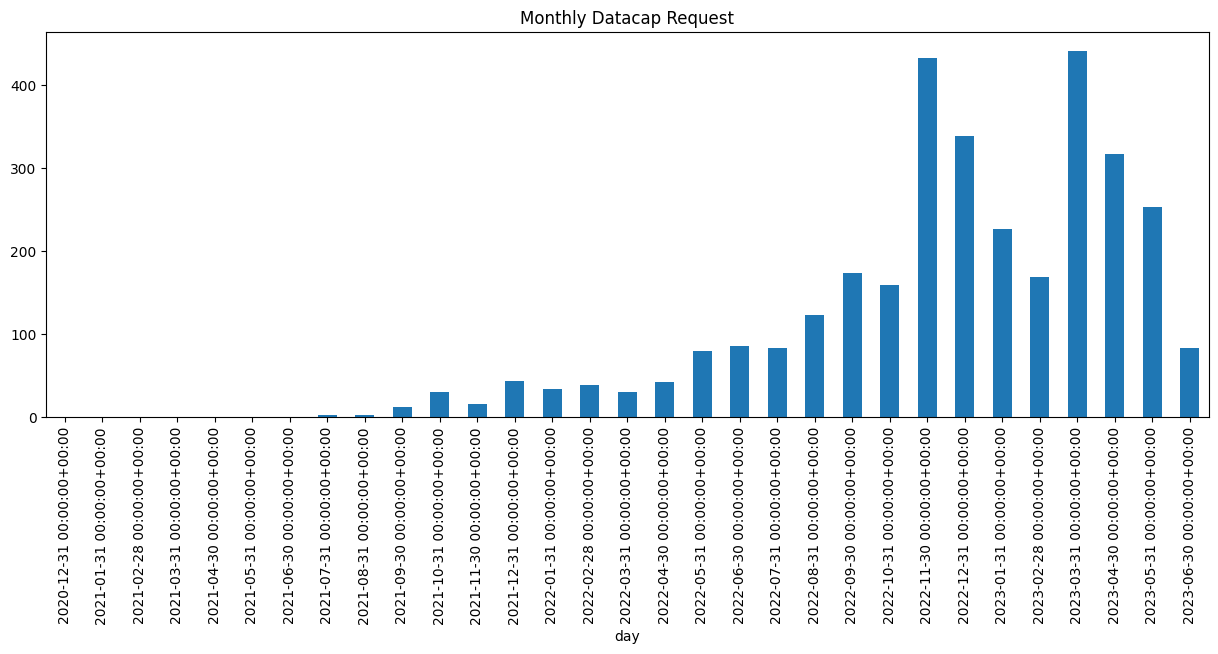

In [31]:
dc_requested = pd.DataFrame(
    requests.get(
        "https://api.datacapstats.io/api/timescale/get-dc-requested/per-day"
    ).json()
)
# Parse day column to datetime and dcRequests to int
dc_requested["day"] = pd.to_datetime(dc_requested["day"])
dc_requested["dcRequests"] = dc_requested["dcRequests"].astype(int)

# Monthly datacap requested
dc_requested.groupby(pd.Grouper(key="day", freq="M"))["dcRequests"].sum().plot(
    kind="bar", figsize=(15, 5), title="Monthly Datacap Request"
)


<Axes: title={'center': 'Monthly Datacap Allowance'}, xlabel='allowanceTimestamp', ylabel='PiBs'>

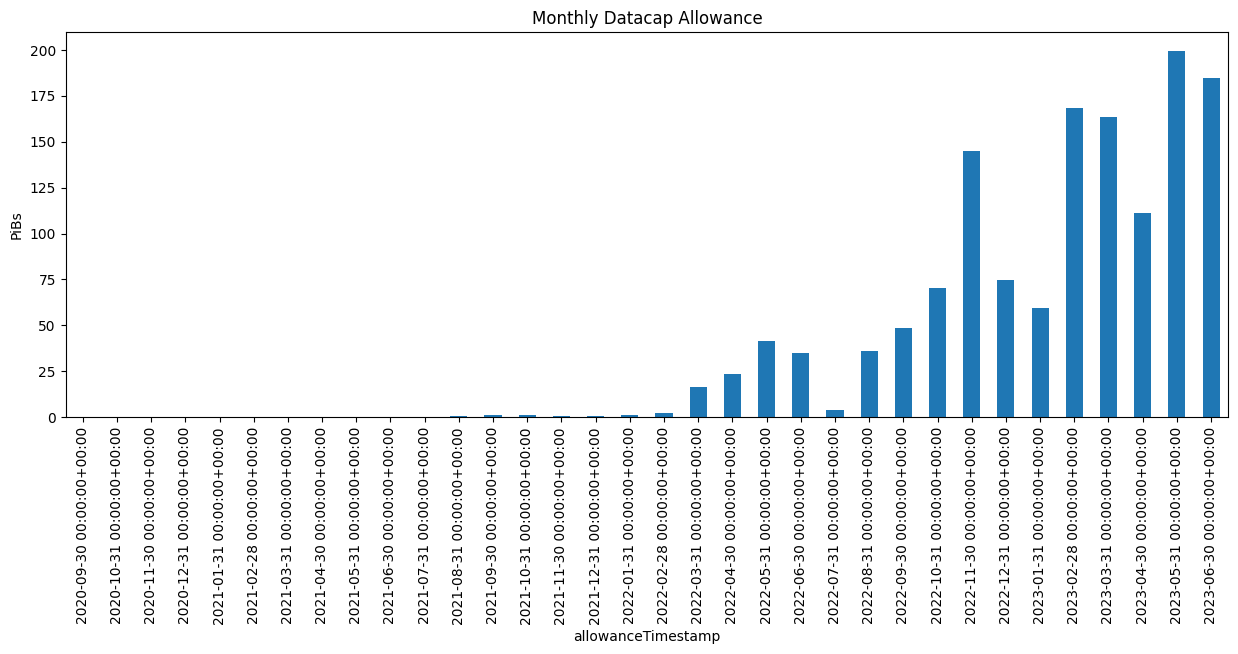

In [38]:
allowance_historic_data = pd.DataFrame(
    requests.get(url + "api/getAllowanceHistoricData").json()
)
# Cast allowance to int and allowanceTimestamp to datetime
allowance_historic_data["allowance_pibs"] = (
    allowance_historic_data["allowance"].astype(int) / 1024**5
)
allowance_historic_data["allowanceTimestamp"] = pd.to_datetime(
    allowance_historic_data["allowanceTimestamp"]
)

# Monthly allowance
allowance_historic_data.groupby(pd.Grouper(key="allowanceTimestamp", freq="M"))[
    "allowance_pibs"
].sum().plot(
    kind="bar", figsize=(15, 5), title="Monthly Datacap Allowance", ylabel="PiBs"
)


Using Filplus API now

In [43]:
url = "https://api.filplus.d.interplanetary.one/public/"
headers = {"x-api-key": os.getenv("FILPLUS_API_KEY")}

# response = requests.request("GET", url, headers=headers)

# requests.get(url + "public/api/getApiKey").json()
# api/getLdnAllowances?page=1&limit=200"


In [57]:
ldn_allowances = pd.DataFrame(
    requests.get(
        url + "api/getLdnAllowances?page=1&limit=5500",
        headers=headers,
    ).json()["data"]
)

ldn_allowances["timestamp"] = pd.to_datetime(ldn_allowances["timestamp"], unit="s")


In [62]:
ldn_allowances


,id,allowanceId,clientAddressId,clientAddress,clientName,verifierAddressId,verifierAddress,verifierName,auditTrail,signers,allowanceNumber,datacapAllocated,height,timestamp,ttd,topProvider,day
0,2715,6017,f02101241,f1fji3yg3t5xyhuzhq34yl7kihbe4jnuyzf55jt7y,JohnsHopkins University Applied Physics Labora...,f02049625,f2yk6skf7mpk5mkp3bk5qyy5pmxgic6hfp55z2wcq,LDN v3.1 multisig,https://github.com/filecoin-project/filecoin-p...,"[{'height': 2944466, 'method': 2, 'msgCID': 'b...",2,562949953421312,2945530,2023-06-13 16:05:00,156643.0,19.32,2023-06-13
1,2714,6014,f01986242,f1wgijz5c25j6n4fvdwwvf3ggj4htbt7qgpj7zj6q,WenChu BlockChain,f02049625,f2yk6skf7mpk5mkp3bk5qyy5pmxgic6hfp55z2wcq,LDN v3.1 multisig,https://github.com/filecoin-project/filecoin-p...,"[{'height': 2834274, 'method': 2, 'msgCID': 'b...",2,207807697649664,2944568,2023-06-13 08:04:00,3626804.0,22,2023-06-13
2,2713,6012,f02208850,f1gg5dvu33z36erx5yinelesxkudovfrz3zyqm4py,Maxstudy abroad consultant company,f02049625,f2yk6skf7mpk5mkp3bk5qyy5pmxgic6hfp55z2wcq,LDN v3.1 multisig,https://github.com/filecoin-project/filecoin-p...,"[{'height': 2941757, 'method': 2, 'msgCID': 'b...",3,1099511627776000,2943883,2023-06-13 02:21:30,78440.0,21.26,2023-06-13
3,2712,6009,f02057946,f1fdall2v6xxtwgohunsybv7kypwoywuzftni5v4q,NDLABS,f02049625,f2yk6skf7mpk5mkp3bk5qyy5pmxgic6hfp55z2wcq,LDN v3.1 multisig,https://github.com/filecoin-project/filecoin-p...,"[{'height': 2941278, 'method': 2, 'msgCID': 'b...",4,2251799813685248,2941977,2023-06-12 10:28:30,150831.0,14.02,2023-06-12
4,2711,6008,f02097088,f15nikeuukgjpk3rf3ndmxljgroagj52vdgznkcwy,Thelotus team - FilDev,f02049625,f2yk6skf7mpk5mkp3bk5qyy5pmxgic6hfp55z2wcq,LDN v3.1 multisig,https://github.com/filecoin-project/filecoin-p...,"[{'height': 2940879, 'method': 2, 'msgCID': 'b...",2,783698902929900,2941589,2023-06-12 07:14:30,110406.0,5.35,2023-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710,5,601,f0397376,f3vnq2cmwig3qjisnx5hobxvsd4drn4f54xfxnv4tciw6v...,Outercore- Network Growth - Engineering,f01105812,f2w55zcpm4anbqzuxjdhxysgmkb2pr3umika5zrly,LDN 2,https://github.com/filecoin-project/filecoin-p...,"[{'height': 1026650, 'method': 3, 'msgCID': 'b...",3,10995116277760,1028844,2021-08-17 03:42:00,378108.0,7.88,2021-08-17
2711,4,595,f0397376,f3vnq2cmwig3qjisnx5hobxvsd4drn4f54xfxnv4tciw6v...,Outercore- Network Growth - Engineering,f01105812,f2w55zcpm4anbqzuxjdhxysgmkb2pr3umika5zrly,LDN 2,https://github.com/filecoin-project/filecoin-p...,"[{'height': 1026642, 'method': 3, 'msgCID': 'b...",2,10995116277760,1026642,2021-08-16 09:21:00,312035.0,7.88,2021-08-16
2712,3,584,f01151139,f3watks6wyq5sakerofowyv7q4gwx4z6ukmfe2irh5zits...,"nft.storage, web3.storage - Protocol Labs",f01105790,f2jg2hduowzwwddbr5msouuttpw6xvxnx43nprwgq,LDN 12,n/a,"[{'height': 992139, 'method': 3, 'msgCID': 'ba...",1,2748779069440,1016222,2021-08-12 18:31:00,NaN,27.12,2021-08-12
2713,2,551,f0843755,f1g463yb4ok3lq3tffkvvfmfyngcagpx4kg7c7rei,Protocol Labs - Filecoin Discover,f01079326,f2ewflkzxmfukahx4jgcjbygcdhzuzdyoha4rb2gi,LDN 1,https://github.com/filecoin-project/filecoin-p...,"[{'height': 967206, 'method': 3, 'msgCID': 'ba...",1,274877906944000,989287,2021-08-03 10:03:30,NaN,24.95,2021-08-03


<Axes: title={'center': 'Monthly LDN Allowances'}, xlabel='timestamp', ylabel='Allowances'>

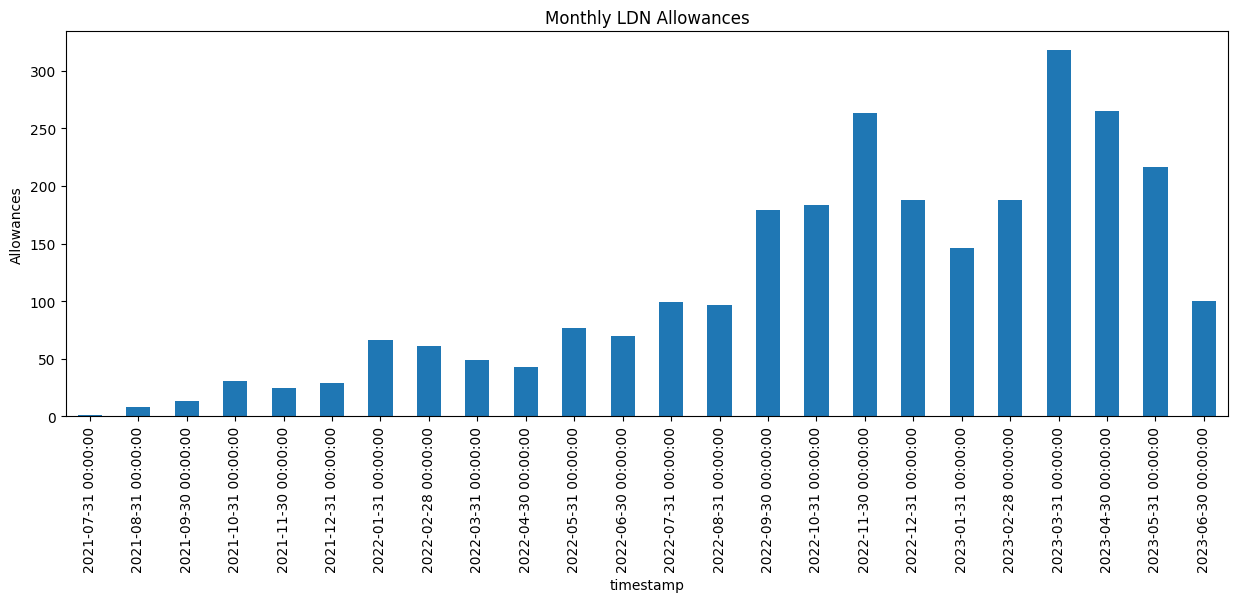

In [65]:
# count allowance by day
ldn_allowances["day"] = ldn_allowances["timestamp"].dt.date

# Plot monthly allowance
ldn_allowances.groupby(pd.Grouper(key="timestamp", freq="M"))[
    "allowanceId"
].count().plot(
    kind="bar", figsize=(15, 5), title="Monthly LDN Allowances", ylabel="Allowances"
)


In [1]:
# Notaries from "https://raw.githubusercontent.com/keyko-io/filecoin-content/main/json/prod/verifiers-registry.json"
